# Telemarketing Banco Portugues

- [ISCTE Repositorio](https://repositorio.iscte-iul.pt/bitstream/10071/9499/5/dss_v3.pdf)
- [SDUM Repo](http://repositorium.sdum.uminho.pt/bitstream/1822/30994/1/dss-v3.pdf)
- [Data Set](https://archive.ics.uci.edu/ml/datasets/Bank+Marketing)
- [Towards Data](https://towardsdatascience.com/machine-learning-case-study-a-data-driven-approach-to-predict-the-success-of-bank-telemarketing-20e37d46c31c)

## Importacao das bibliotecas (`import relevant libraries`)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, Normalizer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score, confusion_matrix

## Leitura de dados (`load data`)

In [3]:
original_dados_banco = pd.read_csv('bank-full.csv', delimiter = ';')
print(original_dados_banco.shape)
original_dados_banco

(45211, 17)


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


#### Copia de dados

In [4]:
df = original_dados_banco.copy()

### Estrutura de dados (`data structure`)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


#### Rapida analise Estatistica de dados (numericos) (`data summary`)

In [6]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [7]:
df.age.describe()

count    45211.000000
mean        40.936210
std         10.618762
min         18.000000
25%         33.000000
50%         39.000000
75%         48.000000
max         95.000000
Name: age, dtype: float64

In [8]:
df.month.describe()

count     45211
unique       12
top         may
freq      13766
Name: month, dtype: object

Text(0.5, 0, 'Count')

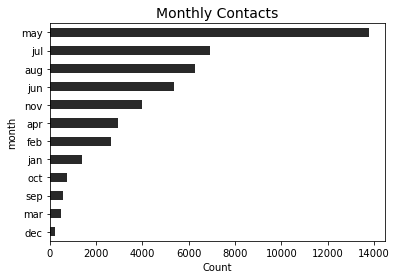

In [9]:
df.groupby(['month'])['month'].count().sort_values().plot(kind='barh', color = '#292929')
plt.title('Monthly Contacts', fontsize =  14)
plt.xlabel('Count')

#### Rapida analise Estatistica de dados (textos - categorias) (`data summary - categorical variables`))

In [10]:
df.select_dtypes('object').describe()

,job,marital,education,default,housing,loan,contact,month,poutcome,y
count,45211,45211,45211,45211,45211,45211,45211,45211,45211,45211
unique,12,3,4,2,2,2,3,12,4,2
top,blue-collar,married,secondary,no,yes,no,cellular,may,unknown,no
freq,9732,27214,23202,44396,25130,37967,29285,13766,36959,39922


## Exploracao de Dados (`Exploratory Data Analysis`)

In [11]:
var_numerica = df.select_dtypes(['int64']).columns.values
var_categorical = df.select_dtypes(['object']).columns.values

In [12]:
for col in var_numerica:
    if df[col].nunique() <= 50:
        print(col, '\n', df[col].unique(), '\n\n')

day 
 [ 5  6  7  8  9 12 13 14 15 16 19 20 21 23 26 27 28 29 30  2  3  4 11 17
 18 24 25  1 10 22 31] 


campaign 
 [ 1  2  3  5  4  6  7  8  9 10 11 12 13 19 14 24 16 32 18 22 15 17 25 21
 43 51 63 41 26 28 55 50 38 23 20 29 31 37 30 46 27 58 33 35 34 36 39 44] 


previous 
 [  0   3   1   4   2  11  16   6   5  10  12   7  18   9  21   8  14  15
  26  37  13  25  20  27  17  23  38  29  24  51 275  22  19  30  58  28
  32  40  55  35  41] 




In [13]:
df['day'].unique()

array([ 5,  6,  7,  8,  9, 12, 13, 14, 15, 16, 19, 20, 21, 23, 26, 27, 28,
       29, 30,  2,  3,  4, 11, 17, 18, 24, 25,  1, 10, 22, 31],
      dtype=int64)

### Valores nulos (`missing data`)

In [14]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [15]:
df.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

## Analise univariavel (`univariate analysis`)
__Age__

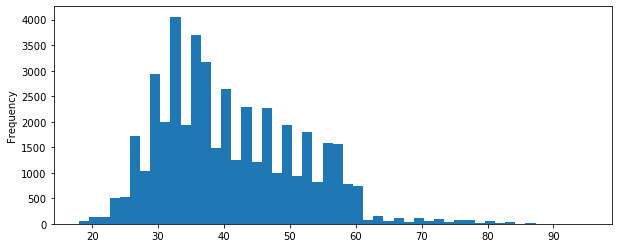

In [16]:
df.age.plot(figsize = (10, 4), kind = 'hist', bins =50)

Text(0.5, 1.0, "['Age Distribution']")

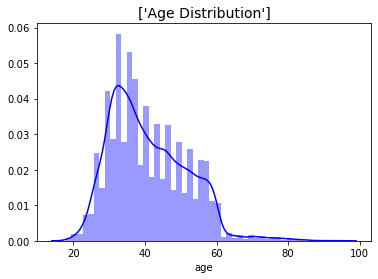

In [17]:
sns.distplot(df.age, hist=True, color='blue')
plt.title(['Age Distribution'], fontsize = 14)

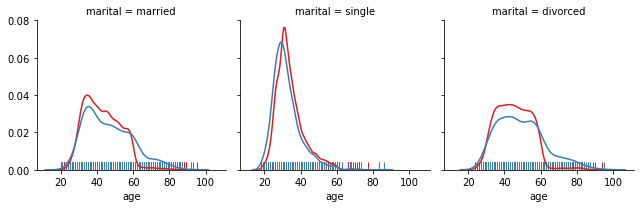

In [18]:
g = sns.FacetGrid(df, col='marital', hue="y", palette="Set1")
g = (g.map(sns.distplot, "age", hist=False, rug=True))

### Dados numericos (`numerical data`)

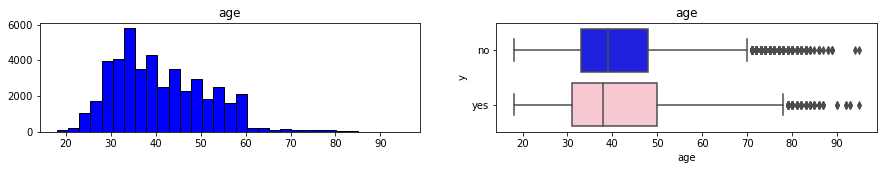

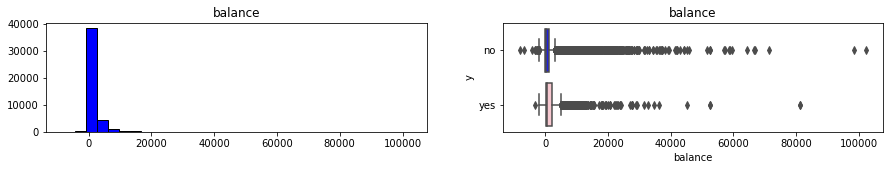

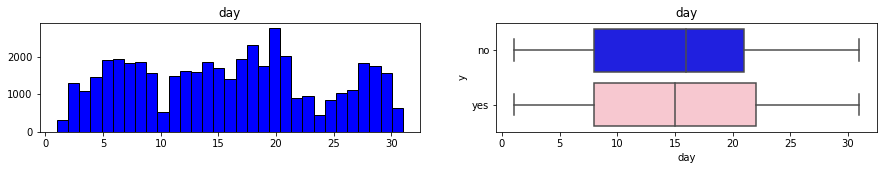

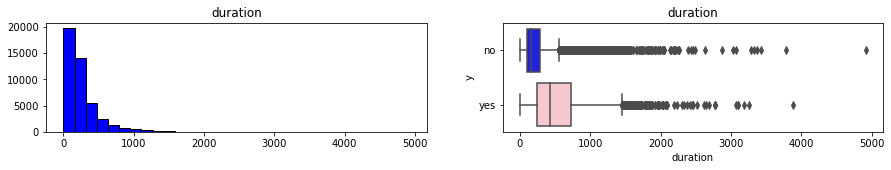

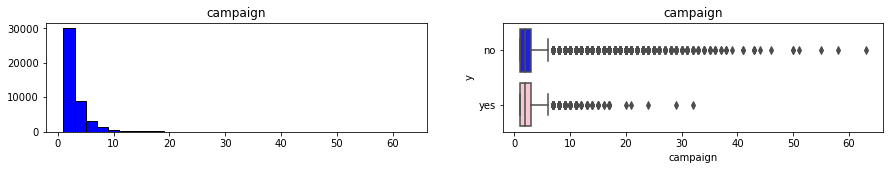

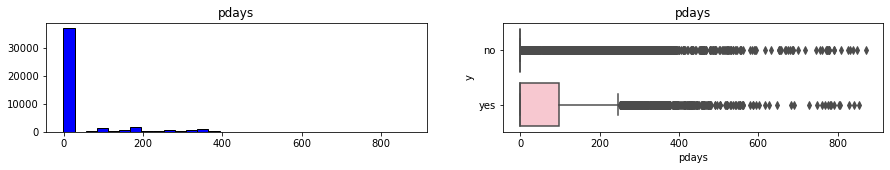

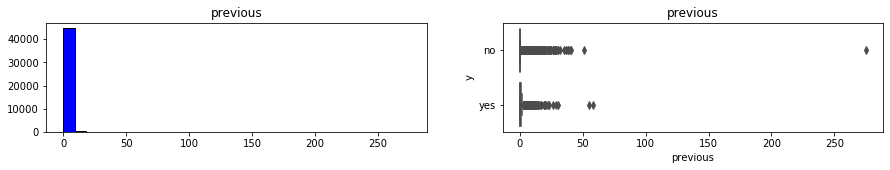

In [19]:
for col in var_numerica:
    fig, axs =  plt.subplots(nrows=1, ncols=2, figsize = (15,2))
    axs = axs.reshape(-1)
    
    axs[0].hist(df[col], bins=31, edgecolor = 'black', color = 'blue')
    axs[0].set_title(col)
    
    sns.boxplot(data=df, x= col, y='y', ax=axs[1], palette = ['blue', 'pink'])
    axs[1].set_title(col)
    #axs[1].set_legend()

#### Dados textos (`categorical data`)

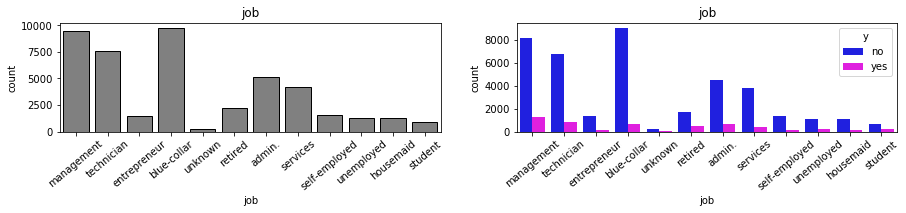

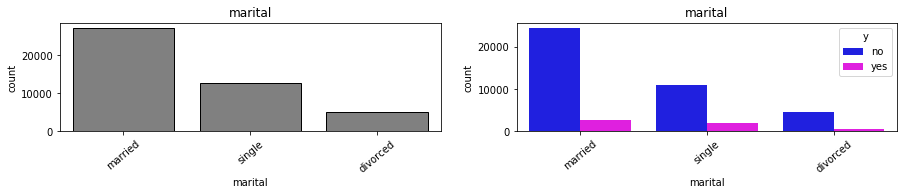

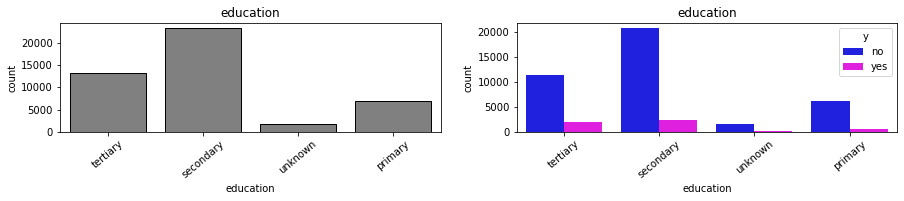

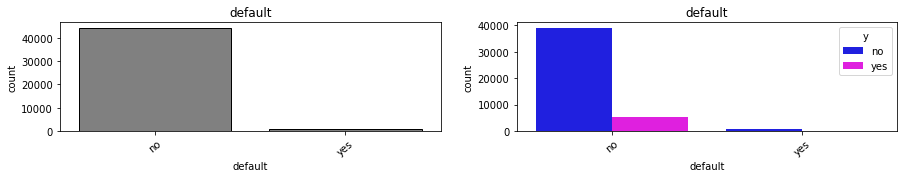

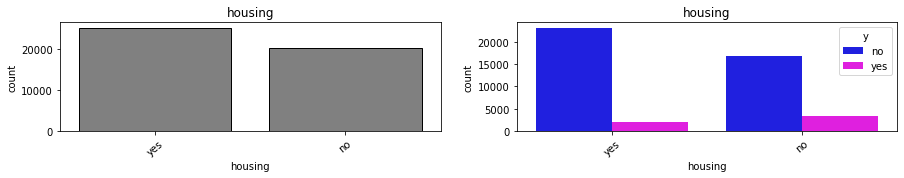

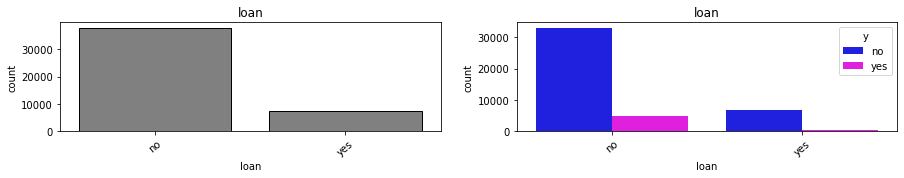

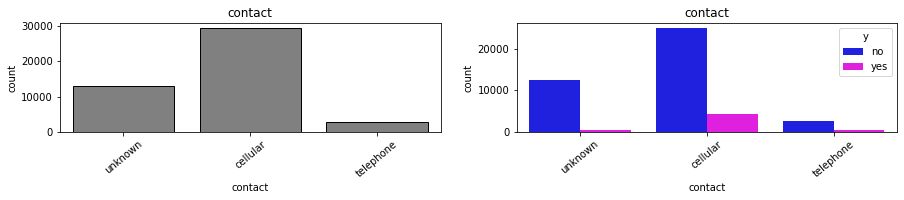

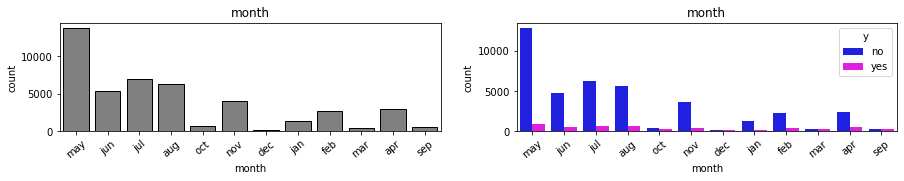

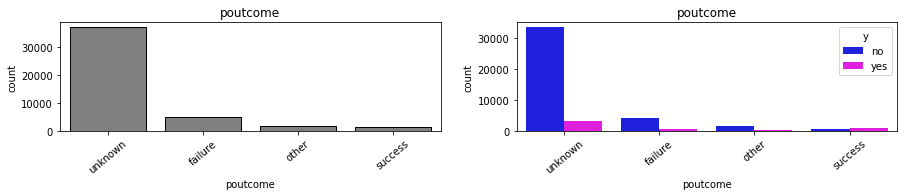

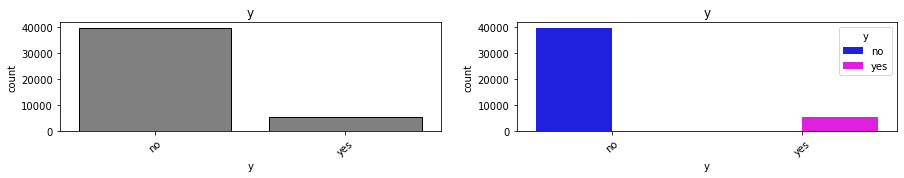

In [20]:
for col in var_categorical:
    
    fig, axs =  plt.subplots(nrows=1, ncols=2, figsize = (15,2))
    axs = axs.reshape(-1)
    
    sns.countplot(data=df, x=col, ax=axs[0], edgecolor = 'black', color = 'grey')
    axs[0].set_title(col)
    axs[0].set_xticklabels(labels = df[col].unique(), rotation=40)
    
    sns.countplot(data=df, x= col, hue='y', ax=axs[1], palette = ['blue', 'magenta'])
    axs[1].set_title(col)
    axs[1].set_xticklabels(labels = df[col].unique(), rotation=40)
    
    #axs[1].set_legend()

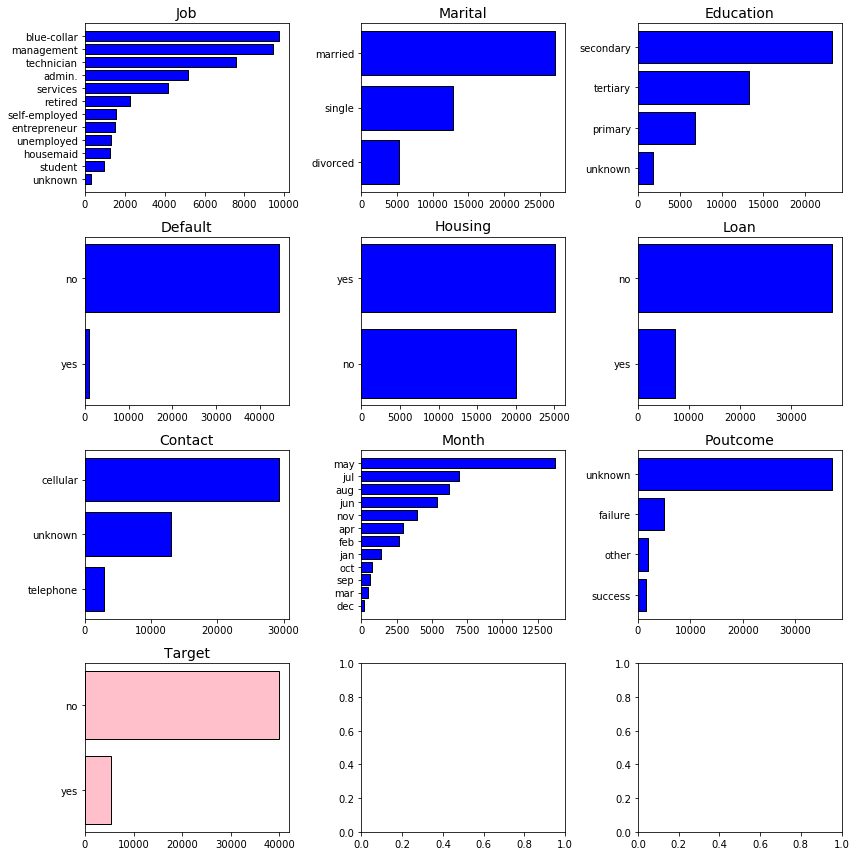

In [21]:
ncol = 3
nrow = int(np.ceil(len(var_categorical) / ncol))


fig, axs = plt.subplots(nrows=nrow, ncols=ncol, figsize=(12, 12))

for (ax, feat) in zip(axs.reshape(-1), var_categorical):
    values = df.groupby(feat)[feat].count().sort_values(ascending=True)
    
    color = '#011321'
    color = 'blue'
    if feat in ['y']:
        color = 'pink'
        feat  = 'Target'
    ax.barh(values.index, values, color=color, edgecolor = 'black')
    ax.set_title(feat.title(), fontsize=14)
    
plt.tight_layout()

# Variavel Independente vs Dependente (`independent vs dependent variables`)

In [38]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

# Precessamento de variaveis (`data preprocessing`)
Antes utilizarmos estes dados nos modelos (machine learning) para determinar padroes uteis para previsao e criacao de novos informacoes, devemos organizar estes dados. Grande parte parte de modelos nao suportam dados em formato textos (em ingles - categorical data). Assim, devemos converter estes dados em numeros alem de considerarmos a aplicacao de engenharia de dados (criacao de novas variaveis apartir das existentes), etc.

### Transformacao de variavel - texto para numerica
Vamos converter dados em formato textos para dados em formato numerico utilizando o metodo da biblioteca pandas. Para isso, 

In [41]:
variavel_texto = X.select_dtypes('object').columns

In [42]:
df_dummies = pd.get_dummies(data=X[variavel_texto], drop_first=True)

In [43]:
X[df_dummies.columns] = df_dummies

In [44]:
X = X.drop(variavel_texto, axis=1)
X

,age,balance,day,duration,campaign,pdays,previous,job_blue-collar,job_entrepreneur,job_housemaid,...,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown
0,58,2143,5,261,1,-1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
1,44,29,5,151,1,-1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
2,33,2,5,76,1,-1,0,0,1,0,...,0,0,0,1,0,0,0,0,0,1
3,47,1506,5,92,1,-1,0,1,0,0,...,0,0,0,1,0,0,0,0,0,1
4,33,1,5,198,1,-1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,825,17,977,3,-1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
45207,71,1729,17,456,2,-1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
45208,72,5715,17,1127,5,184,3,0,0,0,...,0,0,0,0,1,0,0,0,1,0
45209,57,668,17,508,4,-1,0,1,0,0,...,0,0,0,0,1,0,0,0,0,1


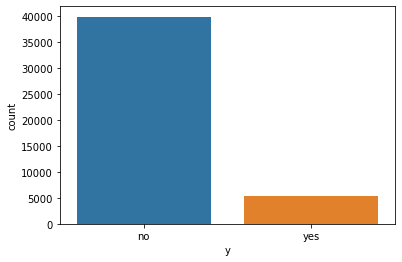

In [45]:
sns.countplot(y)

In [46]:
y = y.map({'no': 0,
          'yes': 1})

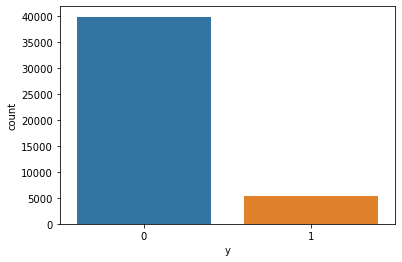

In [47]:
sns.countplot(y)

## Dados para treino e test (`train, test, split`)

In [53]:
from sklearn.model_selection import train_test_split
X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size = 0.2, random_state = 2020)

print('Dimensao de X_treino', X_treino.shape)
print('Dimensao de X_test', X_teste.shape)

Dimensao de X_treino (36168, 42)
Dimensao de X_test (9043, 42)


# Modelo (`model`)

In [60]:
X_treino

,age,balance,day,duration,campaign,pdays,previous,job_blue-collar,job_entrepreneur,job_housemaid,...,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown
7999,53,1942,2,185,2,-1,0,1,0,0,...,0,1,0,0,0,0,0,0,0,1
14632,28,1,15,92,4,-1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
16270,50,29,23,104,1,-1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
5576,38,372,23,59,3,-1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
39926,43,2444,2,130,1,-1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1661,51,370,9,167,1,-1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
18523,46,333,31,284,4,-1,0,1,0,0,...,1,0,0,0,0,0,0,0,0,1
44739,37,698,8,1081,2,-1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
40259,25,1185,15,135,1,-1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1


In [61]:
y_treino

7999     0
14632    0
16270    0
5576     0
39926    0
        ..
1661     0
18523    0
44739    1
40259    0
41824    0
Name: y, Length: 36168, dtype: int64

In [56]:
modelo_reg_logistica = LogisticRegression(class_weight='balanced')
modelo_reg_logistica.fit(X_treino, y_treino)

C:\Users\lmanu\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(class_weight='balanced')

In [65]:
X_teste

,age,balance,day,duration,campaign,pdays,previous,job_blue-collar,job_entrepreneur,job_housemaid,...,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown
28929,44,294,2,246,1,259,2,1,0,0,...,0,0,0,0,0,0,0,0,0,0
33112,31,1742,20,156,1,-1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
36777,32,1005,12,215,1,-1,0,1,0,0,...,0,0,0,1,0,0,0,0,0,1
44314,24,822,28,106,2,-1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
31885,42,1773,9,311,1,336,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27911,48,220,28,73,1,-1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
24901,37,3770,18,106,1,110,4,0,0,0,...,0,0,0,0,1,0,0,0,0,0
26219,57,15062,20,76,9,-1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
37606,32,159,14,46,1,-1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1


In [62]:
y_previsto = modelo_reg_logistica.predict(X_teste)

In [63]:
y_previsto

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [64]:
y_teste

28929    0
33112    0
36777    0
44314    0
31885    0
        ..
27911    0
24901    0
26219    0
37606    0
33749    0
Name: y, Length: 9043, dtype: int64

### Eficicacia (`accuracy`)

In [67]:
accuracy_score(y_teste, y_previsto)

0.8225146522171846

In [70]:
tn, fp, fn, tp = confusion_matrix(y_teste, y_previsto).ravel()

In [74]:
resultado_c_m = pd.DataFrame(np.array([[tp, fn],[fp, tn]]), columns=['Prev Positivo', 'Prev Negativo'],
                             index = ['Atual Positivo', 'Atual Negativo'])

In [84]:
pd.DataFrame(confusion_matrix(y_teste, y_previsto),
             columns=['Prev Negativo', 'Prev Positivo'],
             index = [ 'Atual Negativo', 'Atual Positivo'])

,Prev Negativo,Prev Positivo
Atual Negativo,6601,1389
Atual Positivo,216,837


In [78]:
(tp + tn) / (tp+tn+fp+fn)

0.8225146522171846

In [77]:
resultado_c_m

,Prev Positivo,Prev Negativo
Atual Positivo,837,216
Atual Negativo,1389,6601


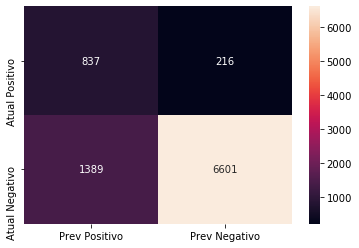

In [94]:
sns.heatmap(resultado_c_m, annot=True, fmt='g')

In [79]:
(tp + tn) / (tp+tn+fp+fn)

0.8225146522171846

In [80]:
# Precisao (precision)
tp /(tp + fp)

0.37601078167115903

In [81]:
tp / (tp + fn)

0.7948717948717948

# New model

In [85]:
model = LogisticRegression(C=10, solver='liblinear')
model.fit(X_treino, y_treino)

LogisticRegression(C=10, solver='liblinear')

In [87]:
y_pred = model.predict(X_teste)

In [95]:
conf_matrix = pd.DataFrame(confusion_matrix(y_teste, y_pred),
             columns=['Prev Negativo', 'Prev Positivo'],
             index = [ 'Atual Negativo', 'Atual Positivo'])


conf_matrix

,Prev Negativo,Prev Positivo
Atual Negativo,7798,192
Atual Positivo,708,345


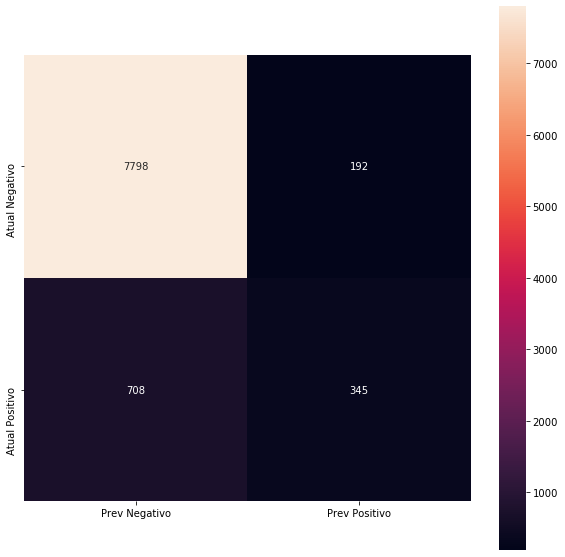

In [96]:
plt.figure(figsize=(10,10))
sns.heatmap(conf_matrix, annot=True, square=True, fmt='g')

In [97]:
from imblearn.over_sampling import SMOTE

In [100]:
aumentar_dados = SMOTE()
X,y = aumentar_dados.fit_resample(X, y)
X.drop(['duration'], axis=1, inplace=True)

In [102]:
X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size = 0.2, random_state = 2020)

model = LogisticRegression(C=10, solver='liblinear')
model.fit(X_treino, y_treino)

print('Eficacia treino', model.score(X_treino, y_treino))
print('Eficacia teste', model.score(X_teste, y_teste))

Eficacia treino 0.9068649706457925
Eficacia teste 0.9068820840378233


In [103]:
y_pred = model.predict(X_teste)
conf_matrix = pd.DataFrame(confusion_matrix(y_teste, y_pred),
             columns=['Prev Negativo', 'Prev Positivo'],
             index = [ 'Atual Negativo', 'Atual Positivo'])


conf_matrix

,Prev Negativo,Prev Positivo
Atual Negativo,7482,555
Atual Positivo,932,7000
